In [ ]:
pip install ucimlrepo

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [288]:
from ucimlrepo import fetch_ucirepo 
 
# fetch dataset 
iris = fetch_ucirepo(id=53) 
  
# data (as pandas dataframes) 
X = iris.data.features 
y = iris.data.targets 
  
# metadata 
print(iris.metadata) 
  
# variable information 
print(iris.variables) 


{'uci_id': 53, 'name': 'Iris', 'repository_url': 'https://archive.ics.uci.edu/dataset/53/iris', 'data_url': 'https://archive.ics.uci.edu/static/public/53/data.csv', 'abstract': 'A small classic dataset from Fisher, 1936. One of the earliest known datasets used for evaluating classification methods.\n', 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Tabular'], 'num_instances': 150, 'num_features': 4, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1936, 'last_updated': 'Tue Sep 12 2023', 'dataset_doi': '10.24432/C56C76', 'creators': ['R. A. Fisher'], 'intro_paper': {'title': 'The Iris data set: In search of the source of virginica', 'authors': 'A. Unwin, K. Kleinman', 'published_in': 'Significance, 2021', 'year': 2021, 'url': 'https://www.semanticscholar.org/paper/4599862ea877863669a6a8e63a3c707a787d5d7e', 'doi': '1740-9713.01589'}, 'add

In [289]:
print(X)

     sepal length  sepal width  petal length  petal width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns]


In [293]:
indexes = y
dictionary_per_class={  
    'petal width': X['petal width']
}

In [294]:
indexes

,class
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa
...,...
145,Iris-virginica
146,Iris-virginica
147,Iris-virginica
148,Iris-virginica


In [297]:
df = pd.DataFrame(dictionary_per_class)
df = df.set_index(indexes['class'])


In [298]:
df

,petal width
class,
Iris-setosa,0.2
Iris-setosa,0.2
Iris-setosa,0.2
Iris-setosa,0.2
Iris-setosa,0.2
...,...
Iris-virginica,2.3
Iris-virginica,1.9
Iris-virginica,2.0


array([[<Axes: title={'center': 'sepal length'}>,
        <Axes: title={'center': 'sepal width'}>],
       [<Axes: title={'center': 'petal length'}>,
        <Axes: title={'center': 'petal width'}>]], dtype=object)

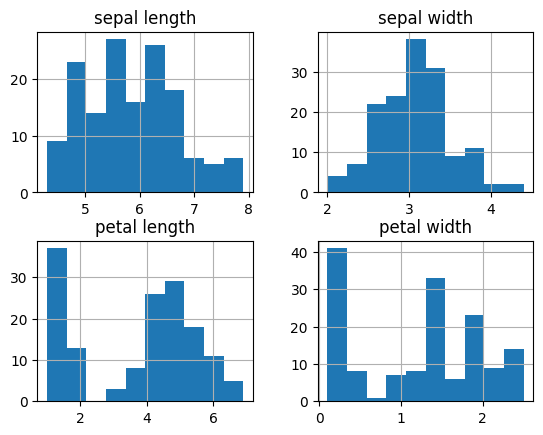

In [318]:
X.hist()

In [313]:
Iris_versicolor = df[df.index == 'Iris-versicolor']
Iris_setosa = df[df.index == 'Iris-setosa']
Iris_virginica = df[df.index == 'Iris-virginica']

array([[<Axes: title={'center': 'petal width'}>]], dtype=object)

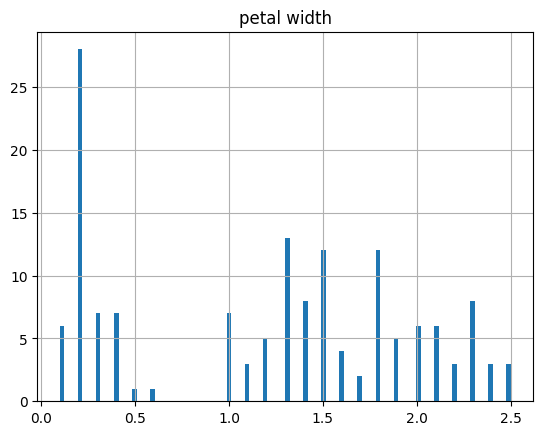

In [317]:
df.hist(bins =100)

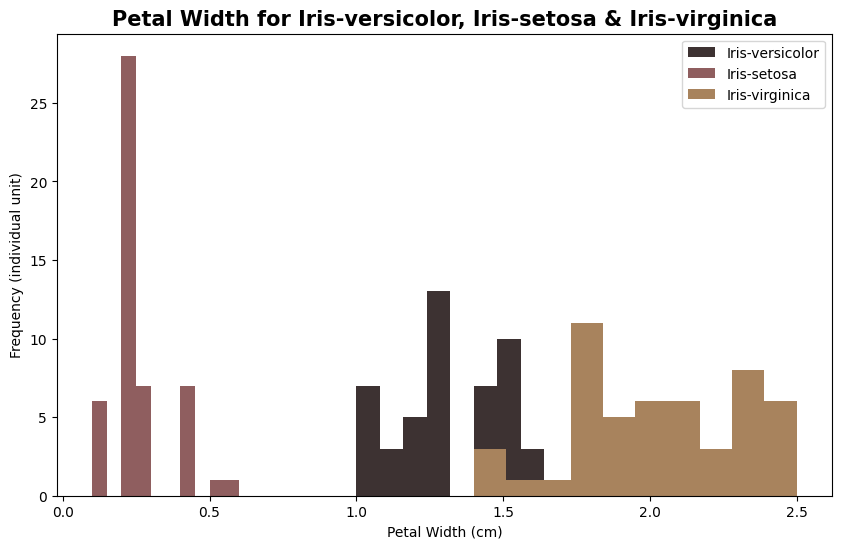

In [315]:
data = {
    'Iris-versicolor': Iris_versicolor,
    'Iris-setosa': Iris_setosa,
    'Iris-virginica': Iris_virginica
    
}
fig, ax = plt.subplots(figsize=(10,6))
colors=['#3d3232', '#8f5e5f', '#a8835d']
for (species, values),color in zip(data.items(), colors):
    ax.hist(values, alpha=1, label=species, color=color)

plt.title('Petal Width for Iris-versicolor, Iris-setosa & Iris-virginica', fontdict={'fontsize': 15, 'fontweight': 'bold'})
plt.xlabel('Petal Width (cm)')
plt.ylabel('Frequency (individual unit)')
plt.legend()
plt.savefig('petal_width_homework.png', format='png', dpi=300)

In [321]:
X.corr()

,sepal length,sepal width,petal length,petal width
sepal length,1.000000,-0.109369,0.871754,0.817954
sepal width,-0.109369,1.000000,-0.420516,-0.356544
petal length,0.871754,-0.420516,1.000000,0.962757
petal width,0.817954,-0.356544,0.962757,1.000000


[['sepal width', 'sepal length'], ['petal length', 'sepal length'], ['petal width', 'sepal length'], ['petal length', 'sepal width'], ['petal width', 'sepal width'], ['petal width', 'petal length']]
6
covariance: 
               sepal length  sepal width  petal length  petal width
sepal length      0.685694    -0.039268      1.273682     0.516904
sepal width      -0.039268     0.188004     -0.321713    -0.117981
petal length      1.273682    -0.321713      3.113179     1.296387
petal width       0.516904    -0.117981      1.296387     0.582414


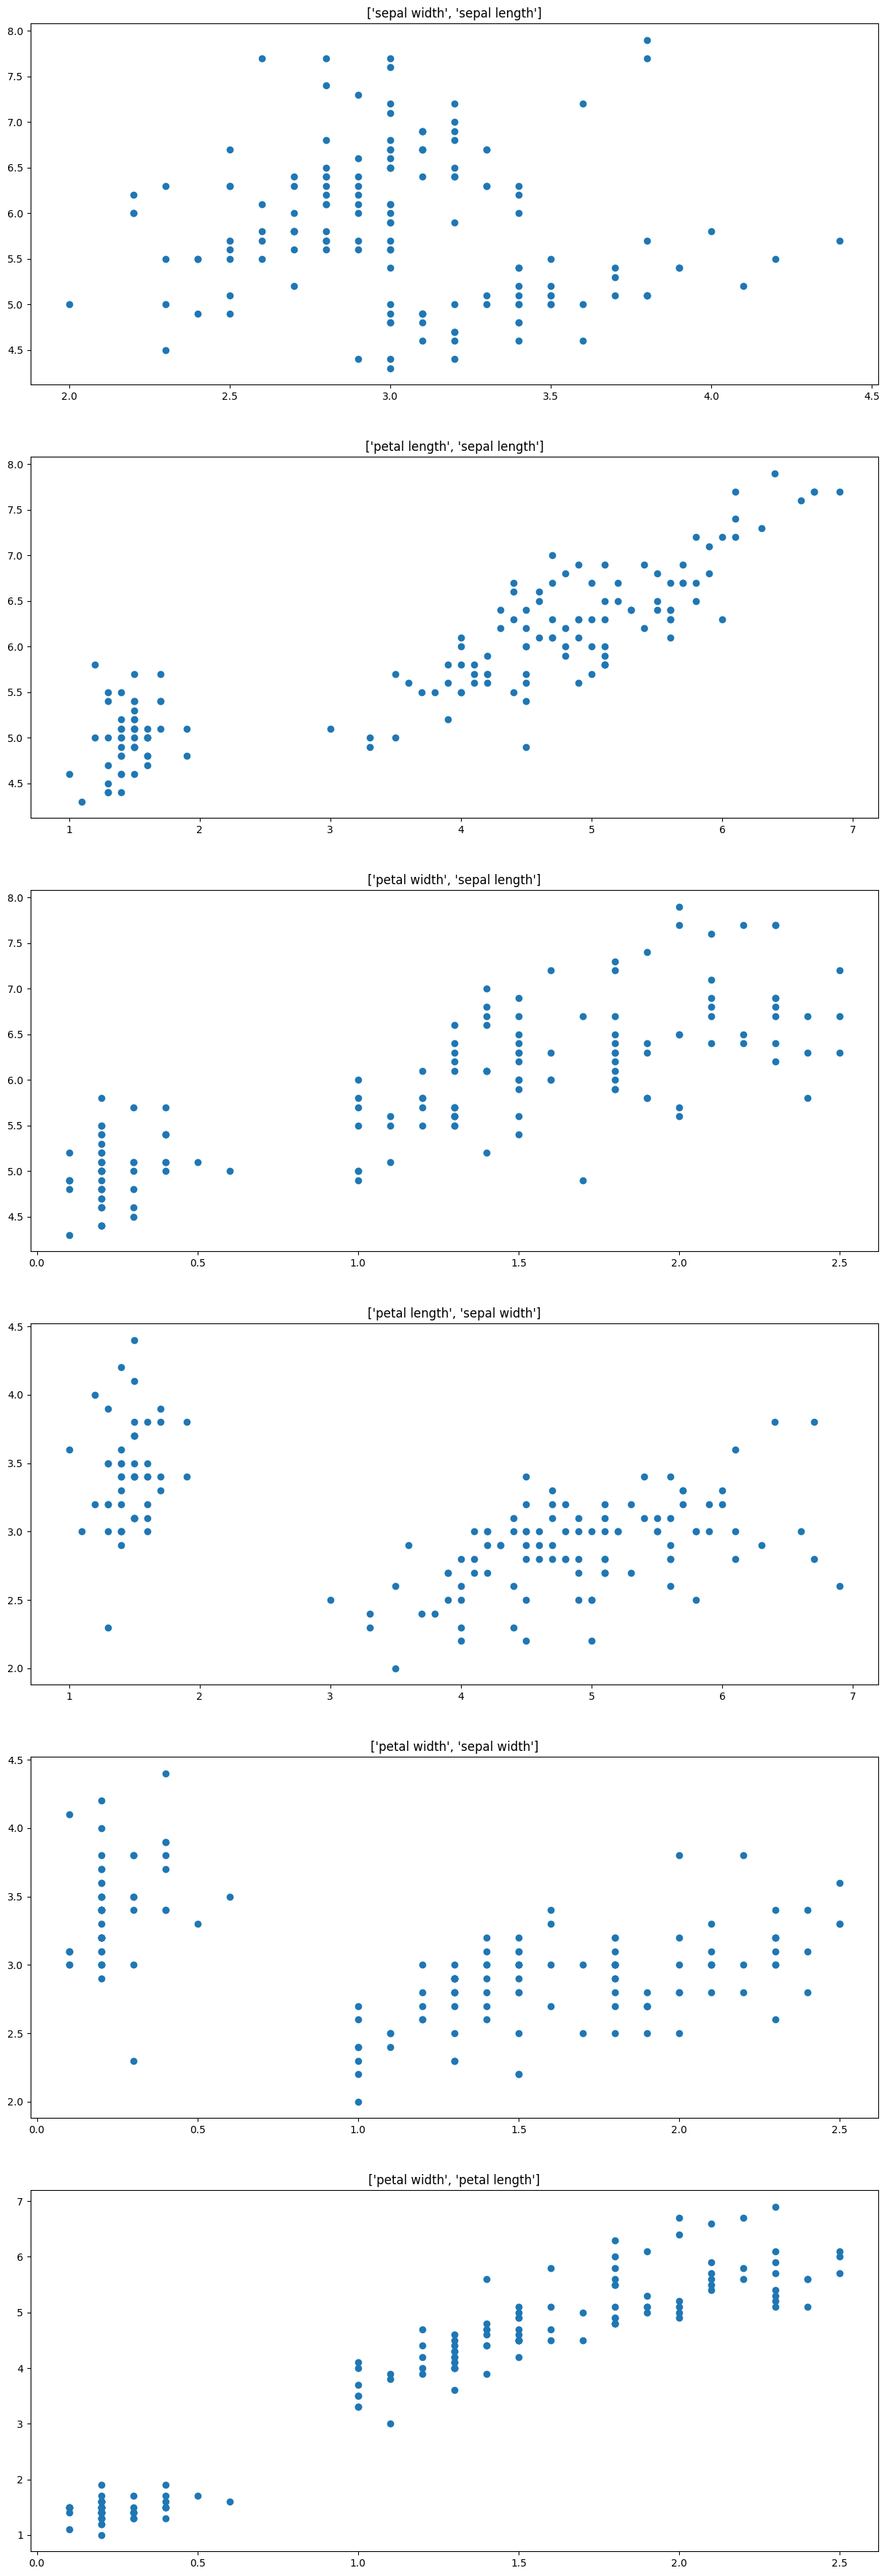

In [268]:
fig,axs = plt.subplots(6,1, figsize=(15,45))
feautures = ['sepal length','sepal width','petal length', 'petal width']
combinations = []
for i in range(len(feautures)):
    for j in range(i+1,len(feautures)):
        item = [feautures[j], feautures[i]]
        
        combinations.append(item)

print(combinations)
print(len(combinations))
print("covariance: \n",df.cov())
for i, combination in enumerate(combinations):
    x = df[combination[0]]
    y = df[combination[1]]
    axs[i].scatter(x,y)
    axs[i].set_title(f'{combination}')
    

plt.show()

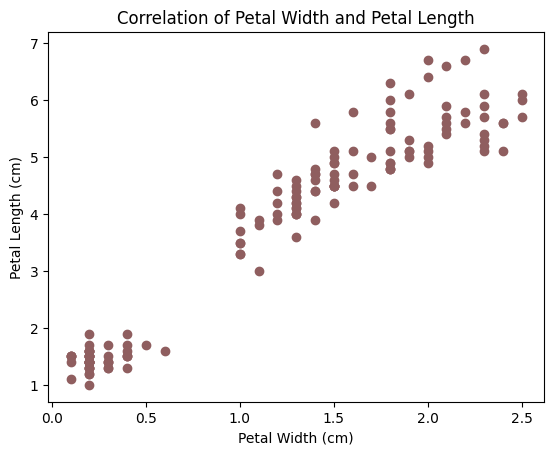

In [329]:
plt.scatter(X['petal width'], X['petal length'], color='#8f5e5f')
plt.title('Correlation of Petal Width and Petal Length')
plt.xlabel('Petal Width (cm)')
plt.ylabel('Petal Length (cm)')
plt.savefig('petal_correlation_homework.png', format='png', dpi=300)